Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 242us/step - loss: 2.6816 - accuracy: 0.4940 - val_loss: 1.8003 - val_accuracy: 0.6300
Epoch 2/20
7982/7982 [==============================] - 2s 210us/step - loss: 1.4560 - accuracy: 0.6922 - val_loss: 1.3174 - val_accuracy: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 182us/step - loss: 1.0677 - accuracy: 0.7674 - val_loss: 1.1298 - val_accuracy: 0.7580
Epoch 4/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.8352 - accuracy: 0.8195 - val_loss: 1.0177 - val_accuracy: 0.7940
Epoch 5/20
7982/7982 [==============================] - 2s 281us/step - loss: 0.6633 - accuracy: 0.8636 - val_loss: 0.9734 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 2s 287us/step - loss: 0.5281 - accuracy: 0.8913 - val_loss: 0.9227 - val_accuracy: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 312us/step - loss

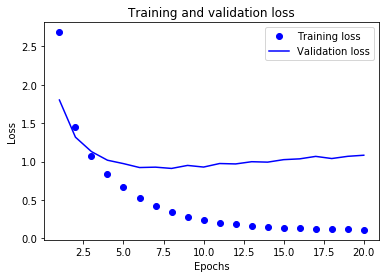

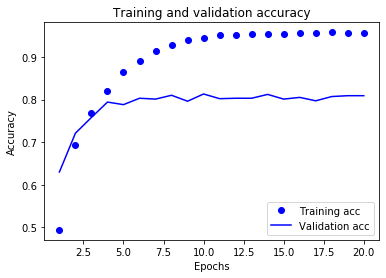

In [16]:
import keras
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#print(len(one_hot_train_labels[0]))

from keras import models
from keras import layers

#Defining the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#Compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#Ploting and training the validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting and training the accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#Retraining amodel from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 201us/step - loss: 2.6559 - accuracy: 0.5405 - val_loss: 1.7958 - val_accuracy: 0.6430
Epoch 2/9
7982/7982 [==============================] - 1s 183us/step - loss: 1.4533 - accuracy: 0.7067 - val_loss: 1.3228 - val_accuracy: 0.7180
Epoch 3/9
7982/7982 [==============================] - 2s 201us/step - loss: 1.0710 - accuracy: 0.7684 - val_loss: 1.1258 - val_accuracy: 0.7600
Epoch 4/9
7982/7982 [==============================] - 2s 239us/step - loss: 0.8391 - accuracy: 0.8205 - val_loss: 1.0158 - val_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.6682 - accuracy: 0.8629 - val_loss: 0.9587 - val_accuracy: 0.7990
Epoch 6/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.5308 - accuracy: 0.8910 - val_loss: 0.8996 - val_accuracy: 0.8180
Epoch 7/9
7982/7982 [==============================] - 2s 189us/step - loss: 0.422

[1.0161499533394247, 0.7845057845115662]

In [22]:
#Generating predictions for new data
predictions = model.predict(x_test)
np.argmax(predictions[0])

3

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
